# Aerofit [Descriptive stats and probability]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import binom
from scipy.stats import norm

In [3]:
data = pd.read_csv(r"D:\Python programmes\Data Collection\aerofit_treadmill.csv")

In [4]:
df = data.copy(deep=True)

In [4]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


- Product Purchased:	KP281, KP481, or KP781
- Age:	In years
- Gender:	Male/Female
- Education:	In years
- MaritalStatus:	Single or partnered
- Usage:	The average number of times the customer plans to use the treadmill each week.
- Income:	Annual income (in $)
- Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles:	The average number of miles the customer expects to walk/run each week

Product Portfolio:
- The KP281 is an entry-level treadmill that sells for \$1,500.
- The KP481 is for mid-level runners that sell for \$1,750.
- The KP781 treadmill is having advanced features that sell for \$2,500.

### checking any duplicate rows

In [5]:
df.duplicated().sum()

0

### checking missing values

In [5]:
df.isnull().sum().sum()

0

 # 1.Analysing basic metrics
  ### - Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [6]:
df.shape

(180, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
df.describe(include=["object"])

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


## conversion of categorical attributes to 'category'

In [10]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#### creating bins for fitness

In [11]:
df["Fitness"].value_counts().sort_index()

1     2
2    26
3    97
4    24
5    31
Name: Fitness, dtype: int64

In [12]:
bins01 = [0,2,3,5]
labels01 = ["Bad","Average","Good"]

In [13]:
df["Fitness_category"]=pd.cut(df["Fitness"], bins=bins01, labels=labels01)

In [14]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good
1,KP281,19,Male,15,Single,2,3,31836,75,Average
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average
3,KP281,19,Male,12,Single,3,3,32973,85,Average
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad


<AxesSubplot:xlabel='count', ylabel='Fitness_category'>

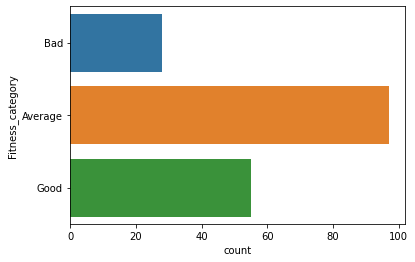

In [15]:
sns.countplot(data=df, y="Fitness_category")

#### creating bins for usage

In [16]:
df["Usage"].value_counts().sort_index()

2    33
3    69
4    52
5    17
6     7
7     2
Name: Usage, dtype: int64

In [17]:
bins02 = [1,3,5,7]
labels02 = ["Low","Medium","High"]

In [18]:
df["Usage_category"]=pd.cut(df["Usage"], bins=bins02, labels=labels02)

In [19]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,Usage_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Low
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Medium
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad,Medium


<AxesSubplot:xlabel='count', ylabel='Usage_category'>

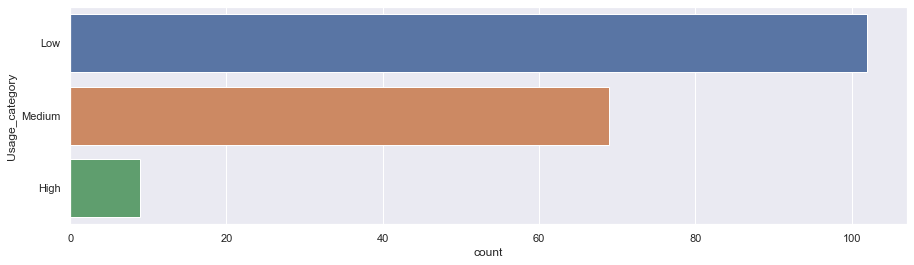

In [105]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, y="Usage_category")

#### creating bins for income

In [21]:
bins03 = [28000,38000,44000,50000,58000,80000,105000]
labels03 = ["Low","BelowAverage","Average","Good","High","VeryHigh"]

In [22]:
df["Income_category"]=pd.cut(df["Income"], bins=bins03, labels=labels03)

In [23]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,Usage_category,Income_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Low,Low
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Low,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Medium,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Low,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad,Medium,Low


<AxesSubplot:xlabel='count', ylabel='Income_category'>

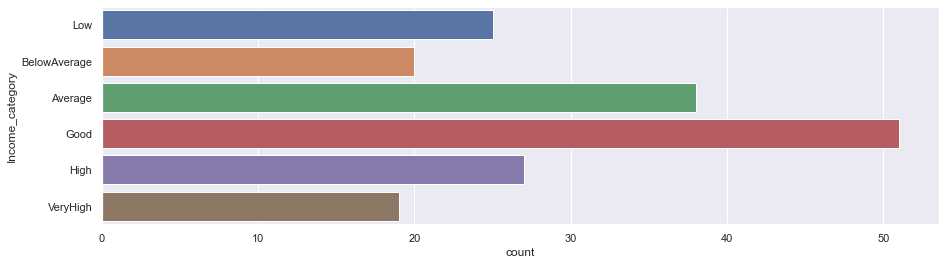

In [104]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, y="Income_category")

#### creating bins for Miles

In [25]:
print(df["Miles"].min(), df["Miles"].quantile(0.25), 
      df["Miles"].quantile(0.5), df["Miles"].quantile(0.75),
      df["Miles"].max())

21 66.0 94.0 114.75 360


<AxesSubplot:xlabel='Miles'>

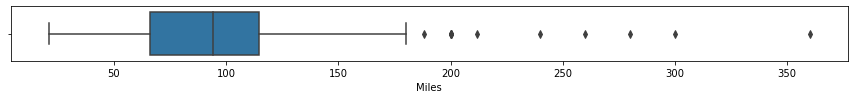

In [26]:
plt.figure(figsize=(15,1))
sns.boxplot(data=df, x="Miles")

In [27]:
bins04 = [20,60,95,115,175,360]
labels04 = ["20-60","60-95","95-115","115-175","175-360"]

In [28]:
df["Miles_category"]=pd.cut(df["Miles"], bins=bins04, labels=labels04)

In [29]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,Usage_category,Income_category,Miles_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Low,Low,95-115
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Low,Low,60-95
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Medium,Low,60-95
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Low,Low,60-95
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad,Medium,Low,20-60


<AxesSubplot:xlabel='count', ylabel='Miles_category'>

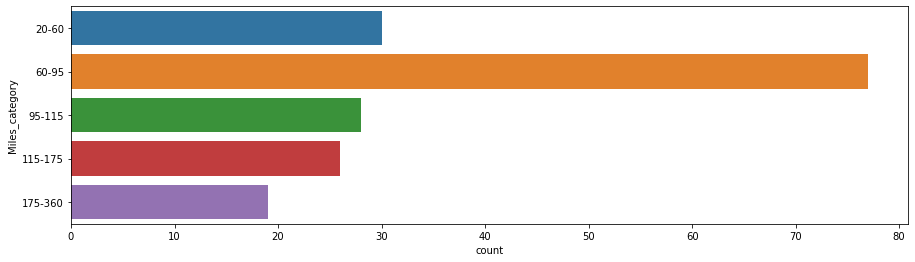

In [30]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, y="Miles_category")

#### adding product price column

In [31]:
def func(x):
    if x=="KP281":
        return 1500
    elif x=="KP481":
        return 1750
    elif x=="KP781":
        return 2500

In [32]:
df["Product_price"] = df["Product"].apply(func)

In [33]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,Usage_category,Income_category,Miles_category,Product_price
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Low,Low,95-115,1500
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Low,Low,60-95,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Medium,Low,60-95,1500
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Low,Low,60-95,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad,Medium,Low,20-60,1500


# 2.Non-Graphical Analysis: Value counts and unique attributes

In [34]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

- Product Portfolio:
 - The KP281 is an entry-level treadmill that sells for $\text{\$1,500.}$ $\textbf{[most sold product]}$
 - The KP481 is for mid-level runners that sell for $\text{\$1,750.}$
 - The KP781 treadmill is having advanced features that sell for $\text{\$2,500.}$ $\textbf{[least sold product]}$

In [35]:
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [36]:
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [37]:
df["Education"].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [38]:
df["Usage_category"].value_counts()

Low       102
Medium     69
High        9
Name: Usage_category, dtype: int64

In [39]:
df["Fitness_category"].value_counts()

Average    97
Good       55
Bad        28
Name: Fitness_category, dtype: int64

In [40]:
df["Income_category"].value_counts()

Good            51
Average         38
High            27
Low             25
BelowAverage    20
VeryHigh        19
Name: Income_category, dtype: int64

In [41]:
df["Miles_category"].value_counts()

60-95      77
20-60      30
95-115     28
115-175    26
175-360    19
Name: Miles_category, dtype: int64

## Outliers in Income and Miles data 

#### Income (mean, median, mode and IQR analysis)

In [42]:
print(df["Income"].min(),
      df["Income"].quantile(0.25),
      df["Income"].quantile(0.50),
      df["Income"].quantile(0.75),
      df["Income"].max())

29562 44058.75 50596.5 58668.0 104581


In [43]:
mode_income = df["Income"].value_counts()[:1].index[0]
mode_income

45480

In [44]:
mean_income = np.mean(df["Income"])
mean_income

53719.57777777778

In [45]:
Q3 = df["Income"].quantile(0.75)
Q3

58668.0

In [46]:
Q1 = df["Income"].quantile(0.25)
Q1

44058.75

In [47]:
IQR = Q3-Q1
IQR

14609.25

In [48]:
lower_limit = Q1-1.5*IQR
lower_limit

22144.875

In [49]:
upper_limit = Q3+1.5*IQR
upper_limit

80581.875

In [50]:
# clearly we have outlier in income data

<AxesSubplot:xlabel='Income'>

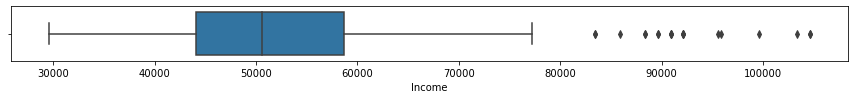

In [51]:
plt.figure(figsize=(15,1))
sns.boxplot(data=df, x="Income")

#### Miles (mean, median, mode and IQR analysis)

In [52]:
# we have outlier in miles data

In [53]:
df["Miles"].min()

21

In [54]:
df["Miles"].max()

360

<AxesSubplot:xlabel='Miles'>

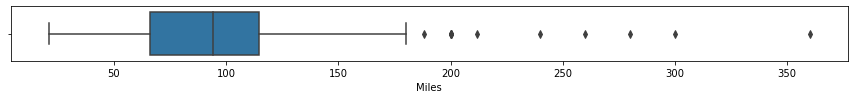

In [55]:
plt.figure(figsize=(15,1))
sns.boxplot(data=df, x="Miles")

# 3.Visual Analysis - Univariate & Bivariate
- For continuous variable(s): Distplot, countplot, histogram for univariate analysis
- For categorical variable(s): Boxplot
- For correlation: Heatmaps, Pairplots

### product analysis

In [56]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [57]:
data001 = df["Product"].value_counts().values
data001

array([80, 60, 40], dtype=int64)

In [58]:
labels001 = df["Product"].value_counts().index
labels001

Index(['KP281', 'KP481', 'KP781'], dtype='object')

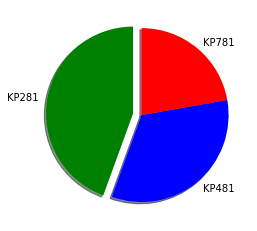

In [59]:
plt.pie(data001,
        labels=labels001,
        colors=["g","b","r"],
        startangle=90,
        shadow=True,
        explode=(0.1,0,0))
plt.show()

- KP281(low cost) is most sold product
- KP781(High cost) is least sold product

### Single vs partnered

<AxesSubplot:xlabel='count', ylabel='MaritalStatus'>

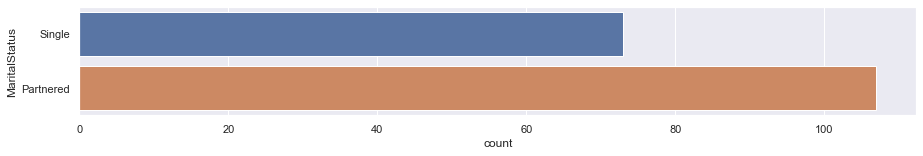

In [60]:
sns.set(rc={'figure.figsize':(15,2)})
sns.countplot(data=df, y="MaritalStatus")

- Married peoples are buying more

<AxesSubplot:xlabel='count', ylabel='MaritalStatus'>

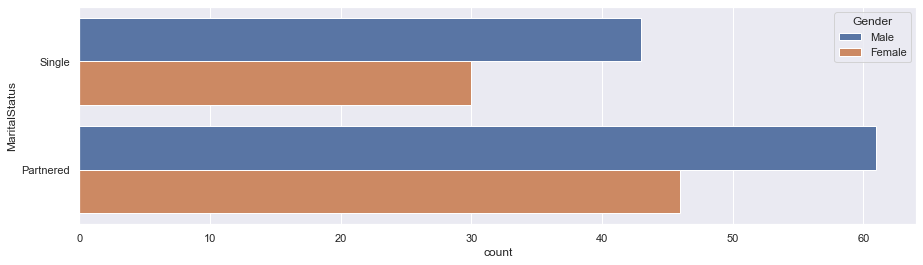

In [61]:
sns.set(rc={'figure.figsize':(15,4)})
sns.countplot(data=df, y="MaritalStatus", hue="Gender")

- single males are buying more compared to single females
- married males are buying more compared to married females

### Age data nanalysis

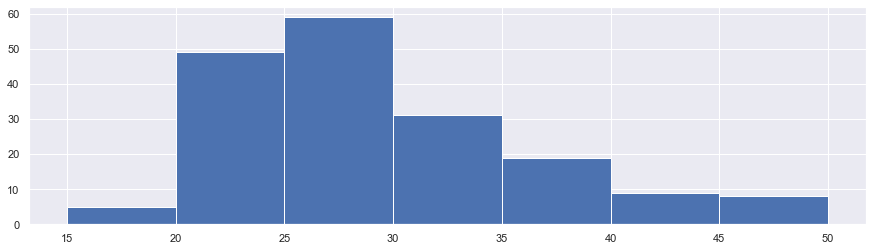

In [62]:
x=df["Age"]
count,bins,patches = plt.hist(x,bins=[15,20,25,30,35,40,45,50])
plt.show()

 - Most of the customers are in Age group 20 to 35 

### Heat map and Correlation

In [63]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles,Product_price
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.029263
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.563463
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.623124
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.696616
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,0.695847
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.643923
Product_price,0.029263,0.563463,0.623124,0.696616,0.695847,0.643923,1.000000


<AxesSubplot:>

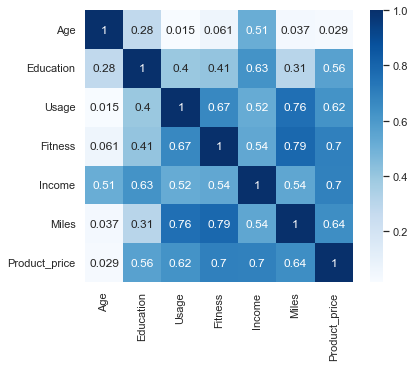

In [64]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

<Figure size 720x720 with 0 Axes>

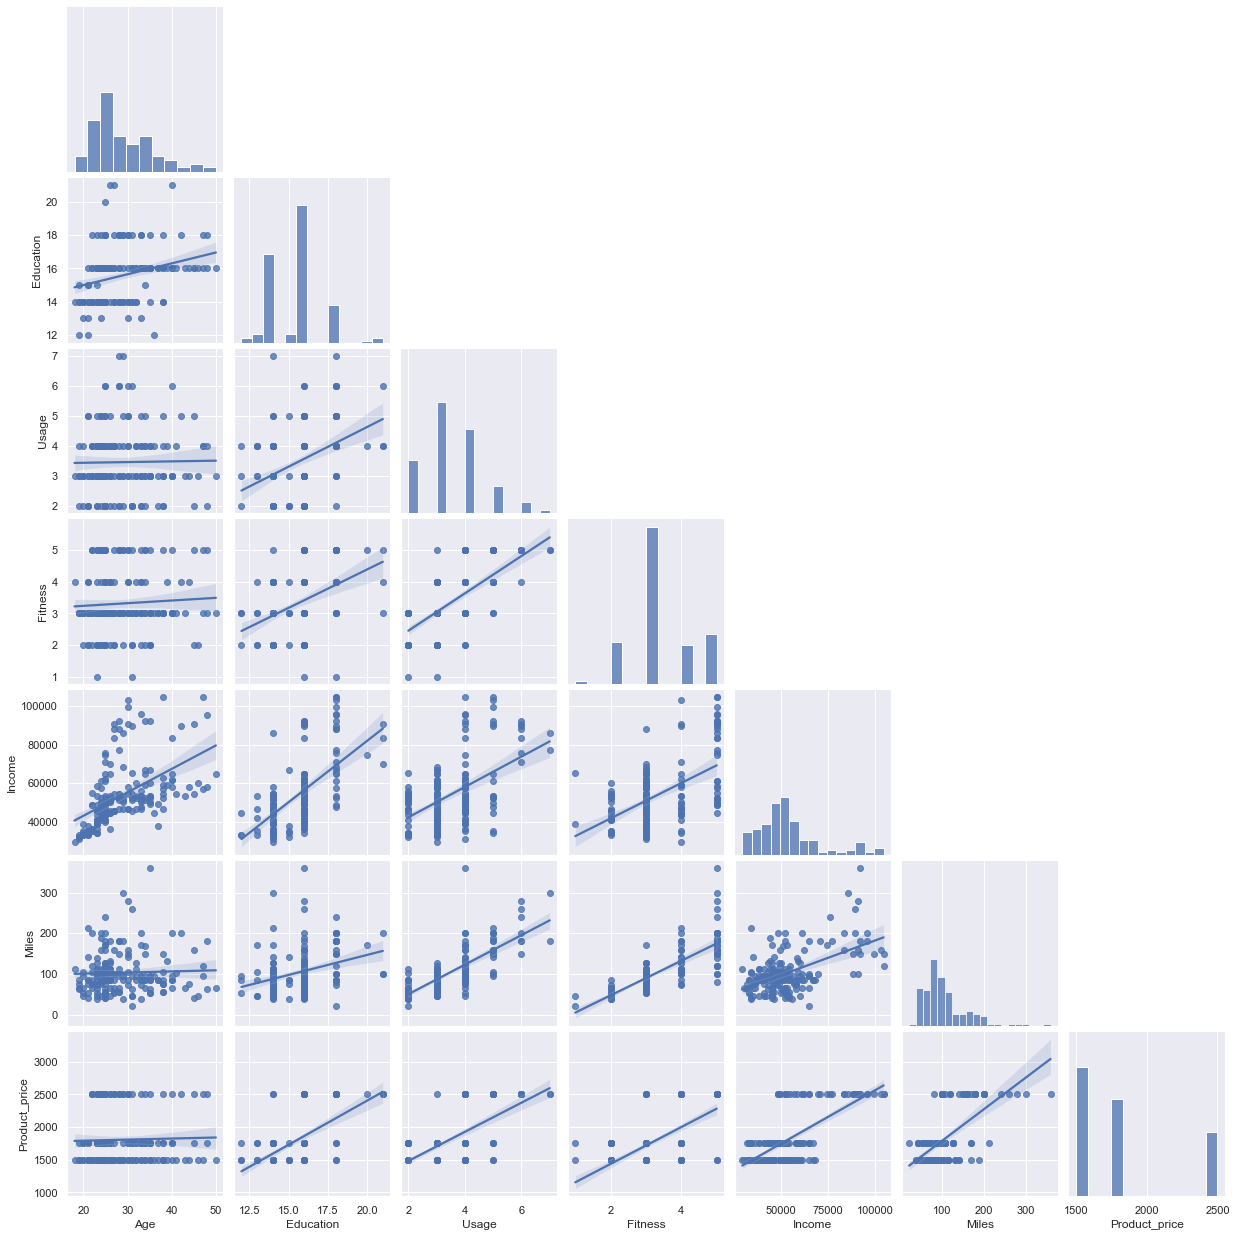

In [65]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df, kind="reg", corner=True)

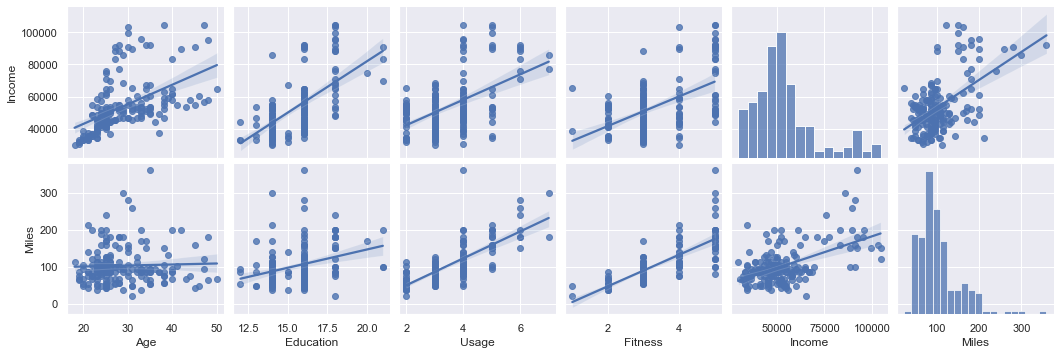

In [66]:
sns.pairplot(
    data=df,kind="reg",
    x_vars=["Age", "Education", "Usage","Fitness","Income","Miles"],
    y_vars=["Income","Miles"],
)

<AxesSubplot:xlabel='Income', ylabel='Usage_category'>

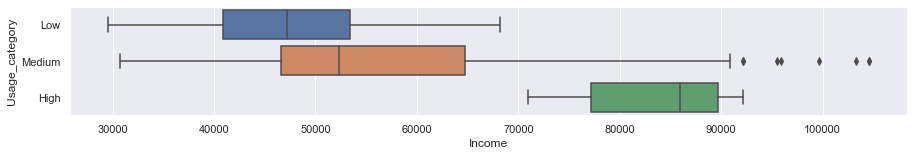

In [67]:
plt.figure(figsize=(15,2))
sns.boxplot(data=df, y="Usage_category", x="Income")

<AxesSubplot:xlabel='Income', ylabel='Fitness_category'>

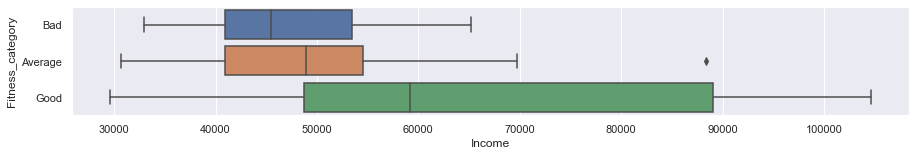

In [68]:
plt.figure(figsize=(15,2))
sns.boxplot(data=df, x="Income", y="Fitness_category")

<AxesSubplot:xlabel='Income', ylabel='Miles_category'>

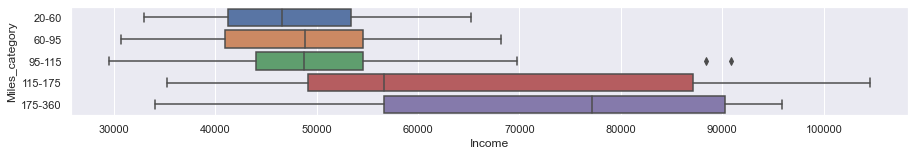

In [69]:
plt.figure(figsize=(15,2))
sns.boxplot(data=df, y="Miles_category", x="Income")

<AxesSubplot:xlabel='Income', ylabel='Product'>

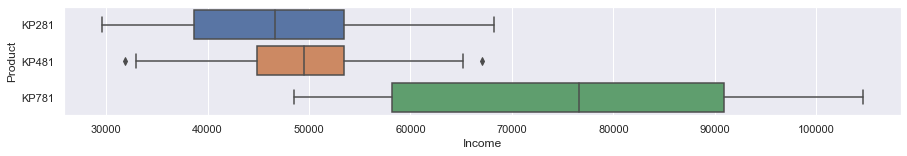

In [70]:
plt.figure(figsize=(15,2))
sns.boxplot(data=df, y="Product", x="Income")

# Descriptive probability calculation

- Customer Profiling - Categorization of users.

Some recommendations and actionable insights, based on the inferences.

### Probability Calculation

#### Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table

In [71]:
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,Usage_category,Income_category,Miles_category,Product_price
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Low,Low,95-115,1500
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Low,Low,60-95,1500


In [72]:
pd.crosstab(index=df["Product"], columns=df["Gender"], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [9]:
#Marginal probability OR Unconditional probability

In [8]:
pd.crosstab(index=df["Product"], columns=df["Gender"], margins=True, normalize=True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


In [14]:
pd.crosstab(index=df["Product"], columns=df["Gender"], margins=True, normalize=True)*100

Gender,Female,Male,All
Product,,,
KP281,22.222222,22.222222,44.444444
KP481,16.111111,17.222222,33.333333
KP781,3.888889,18.333333,22.222222
All,42.222222,57.777778,100.000000


In [11]:
#Conditional probability

In [10]:
pd.crosstab(index=df["Product"], columns=df["Gender"], margins=True, normalize="index")

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000
All,0.422222,0.577778


In [15]:
pd.crosstab(index=df["Product"], columns=df["Gender"], margins=True, normalize="index")*100

Gender,Female,Male
Product,,
KP281,50.000000,50.000000
KP481,48.333333,51.666667
KP781,17.500000,82.500000
All,42.222222,57.777778


In [13]:
pd.crosstab(index=df["Product"], columns=df["Gender"], margins=True, normalize="columns")

Gender,Female,Male,All
Product,,,
KP281,0.526316,0.384615,0.444444
KP481,0.381579,0.298077,0.333333
KP781,0.092105,0.317308,0.222222


In [16]:
pd.crosstab(index=df["Product"], columns=df["Gender"], margins=True, normalize="columns")*100

Gender,Female,Male,All
Product,,,
KP281,52.631579,38.461538,44.444444
KP481,38.157895,29.807692,33.333333
KP781,9.210526,31.730769,22.222222


In [73]:
len(df)

180

In [74]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [75]:
dict01 = dict()

In [76]:
for elm in df["Product"].unique():
    dict01[elm] = (len(df[df["Product"]==elm])/len(df)*100)

In [77]:
dict01

{'KP281': 44.44444444444444,
 'KP481': 33.33333333333333,
 'KP781': 22.22222222222222}

In [78]:
for elm in dict01:
    print(str(dict01[elm])+"% of customer purchased "+str(elm))

44.44444444444444% of customer purchased KP281
33.33333333333333% of customer purchased KP481
22.22222222222222% of customer purchased KP781


In [79]:
data002 = df["Product"].value_counts()
data002.values

array([80, 60, 40], dtype=int64)

In [80]:
labels002 = ['KP281: 44.44%', 'KP481: 33.33%', 'KP781: 22.22%']

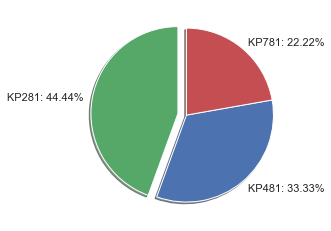

In [81]:
plt.pie(data002.values,
        labels=labels002,
        colors=["g","b","r"],
        startangle=90,
        shadow=True,
        explode=(0.1,0,0))
plt.show()

### What is the probability of a male customer buying a KP781 treadmill?

In [82]:
pd.crosstab(index=df["Product"], columns=df["Gender"], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [83]:
len(df[(df["Gender"]=="Male")&(df["Product"]=="KP781")])

33

In [84]:
len(df[df["Gender"]=="Male"])

104

In [85]:
len(df[(df["Gender"]=="Male")&(df["Product"]=="KP781")])/len(df[df["Gender"]=="Male"])

0.3173076923076923

In [86]:
len(df[(df["Gender"]=="Male")&(df["Product"]=="KP481")])/len(df[df["Gender"]=="Male"])

0.2980769230769231

In [87]:
len(df[(df["Gender"]=="Male")&(df["Product"]=="KP281")])/len(df[df["Gender"]=="Male"])

0.38461538461538464

- male customer has 31.73% chance of buying KP781 [high-cost]
- male customer has 29.80% chance of buying KP481 [medium-cost]
- male customer has 38.46% chance of buying KP281 [low-cost]

### What is the probability of a female customer buying a KP781 treadmill?

In [88]:
len(df[(df["Gender"]=="Female")&(df["Product"]=="KP781")])/len(df[df["Gender"]=="Female"])

0.09210526315789473

In [89]:
len(df[(df["Gender"]=="Female")&(df["Product"]=="KP481")])/len(df[df["Gender"]=="Female"])

0.3815789473684211

In [90]:
len(df[(df["Gender"]=="Female")&(df["Product"]=="KP281")])/len(df[df["Gender"]=="Female"])

0.5263157894736842

- female customer has 9.21% chance of buying KP781 [high-cost]
- female customer has 38.15% chance of buying KP481 [medium-cost]
- female customer has 52.63% chance of buying KP281 [low-cost]

### Probability- marginal, conditional probability.

In [91]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Fitness_category', 'Usage_category',
       'Income_category', 'Miles_category', 'Product_price'],
      dtype='object')

In [92]:
pd.crosstab(index=df["Product"], columns=df["MaritalStatus"], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [93]:
len(df[(df["MaritalStatus"]=="Partnered")&(df["Product"]=="KP281")])/len(df[df["MaritalStatus"]=="Partnered"])

0.4485981308411215

In [94]:
len(df[(df["MaritalStatus"]=="Single")&(df["Product"]=="KP281")])/len(df[df["MaritalStatus"]=="Single"])

0.4383561643835616

- married person has 44.85% chance of buying KP281 [low-cost]
- single person has 43.83% chance of buying KP281  [low-cost]

# Customer Profiling - Categorization of users.

In [95]:
pd.crosstab(index=df["Product"], columns=df["Income_category"], margins=True)

Income_category,Low,BelowAverage,Average,Good,High,VeryHigh,All
Product,,,,,,,
KP281,18,12,18,25,7,0,80
KP481,7,8,15,21,9,0,60
KP781,0,0,5,5,11,19,40
All,25,20,38,51,27,19,180


Income range
- 28k-38k   Low
- 38k-44k   BelowAverage
- 44k-50k   Average
- 50k-58k   Good
- 58k-80k   High
- 80k-105k  VeryHigh

### Low income individual (salary range: 28k-38k dollars)

In [96]:
print(18/25,7/25,0/25)

0.72 0.28 0.0


- Low income individual has 72% chance of buying KP281 [low-cost]
- Low income individual has 28% chance of buying KP481 [medium-cost]
- Low income individual has 0% chance of buying KP781  [high-cost]

### Below average income individual (salary range: 38k-44k dollars)

In [97]:
print(12/20, 8/20, 0/20)

0.6 0.4 0.0


- below average income individual has 60% chance of buying KP281 [low-cost]
- below average income individual has 40% chance of buying KP481 [medium-cost]
- below average income individual has 0% chance of buying KP781  [high-cost]

### average income individual (salary range: 44k-50k dollars)

In [98]:
print(18/38, 15/38, 5/38)

0.47368421052631576 0.39473684210526316 0.13157894736842105


- average income individual has 47.36% chance of buying KP281 [low-cost]
- average income individual has 39.47% chance of buying KP481 [medium-cost]
- average income individual has 13.15% chance of buying KP781  [high-cost]

### good income individual (salary range: 50k-58k dollars)

In [99]:
print(25/51, 21/51, 5/51)

0.49019607843137253 0.4117647058823529 0.09803921568627451


- good income individual has 49.01% chance of buying KP281 [low-cost]
- good income individual has 41.17% chance of buying KP481 [medium-cost]
- good income individual has 9.80% chance of buying KP781  [high-cost]

### high income individual (salary range: 58k-80k dollars)

In [100]:
print(7/27, 9/27, 11/27)

0.25925925925925924 0.3333333333333333 0.4074074074074074


- high income individual has 25.92% chance of buying KP281 [low-cost]
- high income individual has 33.33% chance of buying KP481 [medium-cost]
- high income individual has 40.74% chance of buying KP781  [high-cost]

### very high income individual (salary range: 80k-105k dollars)

In [101]:
print(0/19, 0/19, 19/19)

0.0 0.0 1.0


- very high income individual has 0% chance of buying KP281 [low-cost]
- very high income individual has 0% chance of buying KP481 [medium-cost]
- very high income individual has 100% chance of buying KP781  [high-cost]

In [102]:
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx

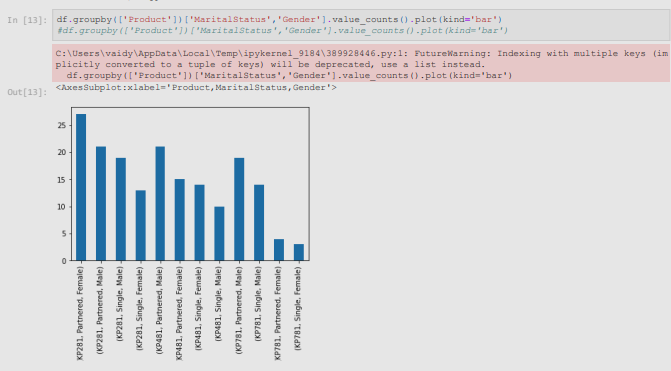

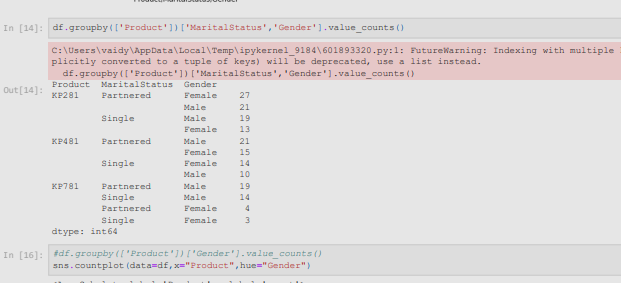

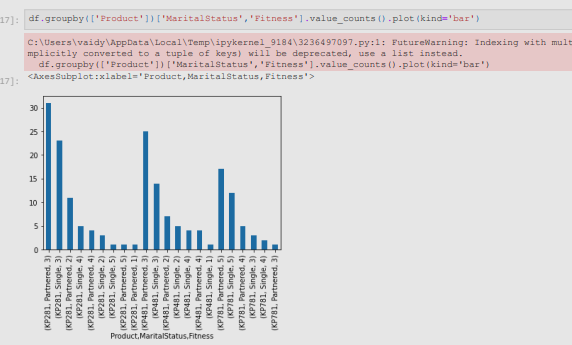